In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [47]:
df = df.drop(['Unnamed: 0','key','pickup_datetime'], axis=1)

In [48]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [49]:
df=df.dropna()
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

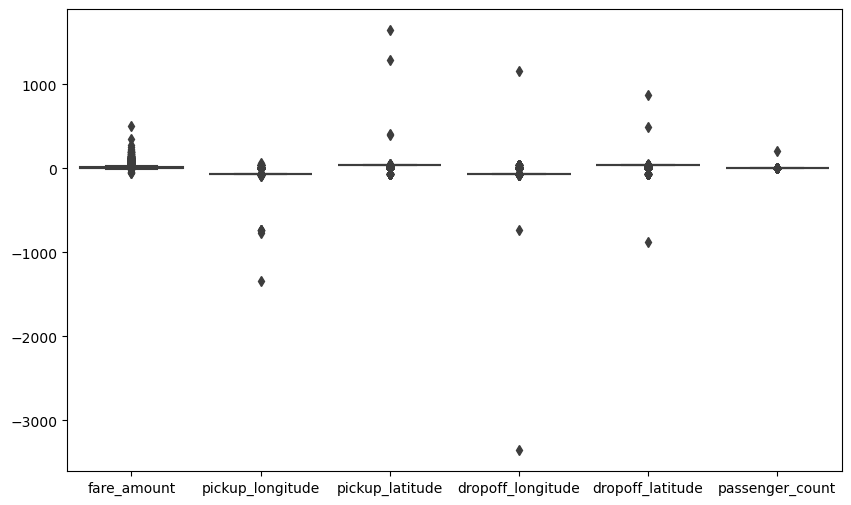

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

In [51]:
for col in df.columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lb=Q1-1.5*IQR
    ub=Q3+1.5*IQR
    df=df[(df[col]>=lb) & (df[col]<=ub)]

In [52]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [53]:
scaled_df

array([[-0.2932847 , -1.1178711 , -0.67988539, -1.10660975, -1.33944605,
        -0.47502273],
       [-0.24166807, -0.77733472, -1.15915782, -0.81952246, -0.1218992 ,
        -0.47502273],
       [ 1.10036418, -1.44370658, -0.565552  ,  1.10237707,  0.88068643,
        -0.47502273],
       ...,
       [-0.2932847 , -0.17673965, -0.75165417, -1.53471183, -0.60271092,
        -0.47502273],
       [ 1.51329718, -0.94995784, -1.29035095, -0.13227415, -2.58814233,
        -0.47502273],
       [ 1.41006393, -0.15635196, -1.54470586, -0.2693492 ,  0.70758523,
        -0.47502273]])

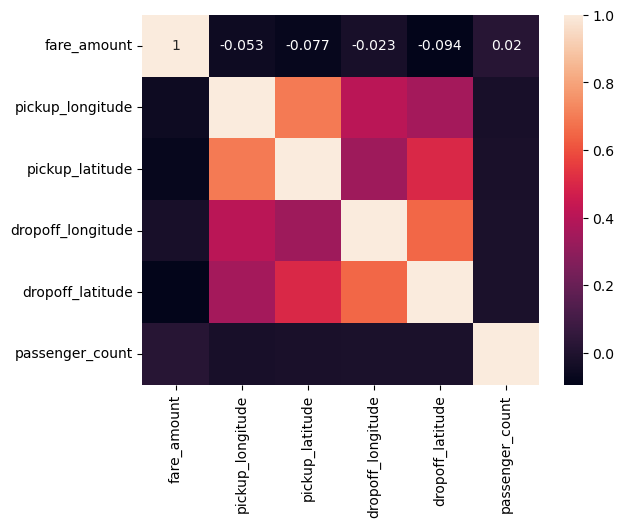

In [54]:
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [55]:
X = df[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count"]]
Y = df["fare_amount"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [56]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [57]:
y_pred = model.predict(X_test)
y_pred

array([8.93136192, 8.15574354, 8.45067261, ..., 8.31904562, 7.93733037,
       8.2619547 ])

In [58]:
r2score = r2_score(Y_test, y_pred)
print("R2 Score: ", r2score)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print("RMSE: ",rmse)

R2 Score:  0.010284852405408884
RMSE:  3.8639222017322674


In [59]:
model1 = RandomForestRegressor()
model1.fit(X_train,Y_train)

RandomForestRegressor()

In [60]:
y_pred = model1.predict(X_test)
y_pred

array([ 8.381,  5.137,  4.313, ...,  8.522, 11.025,  7.494])

In [61]:
r2score = r2_score(Y_test, y_pred)
print("R2 Score: ", r2score)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print("RMSE: ",rmse)

R2 Score:  0.6985581927072251
RMSE:  2.1324310980654775
